# Learning pandas

This section is about learning how to work with `pandas` by using it
without much guidance. You will play with the
[dataset](https://www.gov.scot/publications/scottish-index-of-multiple-deprivation-2020v2-ranks/)
of the [Scottish Index of Multiple
Deprivation](https://www.gov.scot/collections/scottish-index-of-multiple-deprivation-2020/#lookupfiles)
(SIMD). Specifically, you will load a table containing the rank of each
data zone according to the overall SIMD and according to its subdomains
(check the links above if you would like to learn more).

## Data Preparation

Before you start playing with the data, you need to figure out how to
read the data. It is not a CSV file this time, but XLSX. `pandas` is
capable of reading Excel files like this one. Instead of the `read_csv`
you used before, you just need to use `read_excel` this time.

Take a second to download the
[dataset](https://www.gov.scot/publications/scottish-index-of-multiple-deprivation-2020v2-ranks/)
and check its structure in Excel before moving forward.

You have probably figured out that there are two sheets in this file,
and you need to read the second one, called `"SIMD 2020v2 ranks"`.

Let’s start by importing `pandas`.

In [1]:
import pandas as pd

Since you have the file in your Downloads folder now, you can read it
from there. Or you can read it directly from `gov.scot`.

In [3]:
url = "https://www.gov.scot/binaries/content/documents/govscot/publications/statistics/2020/01/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/documents/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/scottish-index-of-multiple-deprivation-2020-ranks-and-domain-ranks/govscot%3Adocument/SIMD%2B2020v2%2B-%2Branks.xlsx"

To read the proper sheet, you need to specify `sheet_name` to
`read_excel`. `pandas` will download the file for you and open it as a
`DataFrame`.

In [2]:
# simd = pd.read_excel(url, sheet_name="SIMD 2020v2 ranks")
simd = pd.read_excel("SIMD+2020v2+-+ranks.xlsx", sheet_name="SIMD 2020v2 ranks")

> **Reading a local file**
>
> If you want to read the file from your downloads folder, you will need
> to pass its location. That can look like this if you are on macOS:
>
> ``` py
> simd = pd.read_excel(
>     "/Users/martin/Downloads/SIMD+2020v2+-+ranks.xlsx",
>     sheet_name="SIMD 2020v2 ranks",
> )
> ```
>
> Or like this if you are on Windows. Note the `r` in front of the
> string, ensuring that the backlashes (`\`), common in Windows file
> paths, are properly interpreted. Or you can replace them with `/`:
>
> ``` py
> simd = pd.read_excel(
>     r"C:\Users\martin\Downloads\SIMD+2020v2+-+ranks.xlsx",
>     sheet_name="SIMD 2020v2 ranks",
> )
> ```
>
> Alternatively, you can read the file from the `data` folder attached
> to this lecture.
>
> ``` py
> simd = pd.read_excel(
>     "https://martinfleischmann.net/sds/data_wrangling/data/SIMD+2020v2+-+ranks.xlsx",
>     sheet_name="SIMD 2020v2 ranks",
> )
> ```

And you should be good to go!

In [3]:
simd.head()

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank
0,S01006506,Culter,Aberdeen City,894,580,4691,3936.0,3220.0,5174,5887,4724,4664.0,3248.0
1,S01006507,Culter,Aberdeen City,793,470,4862,4829.0,4481.0,5051,4384,2148,4602.0,3486.0
2,S01006508,Culter,Aberdeen City,624,461,5686,4460.0,5110.0,5942,5915,4200,4563.5,5342.0
3,S01006509,Culter,Aberdeen City,537,307,4332,3481.0,3229.0,3871,6401,3982,5626.0,4394.5
4,S01006510,Culter,Aberdeen City,663,415,3913,3344.0,3448.0,3049,4092,5588,3885.0,3736.0


## Learn about Scotland

In the previous chapter, you learned the basics of `pandas`. Now is the
time to use this knowledge and learn something about Scotland. The SIMD
rankings are similar in structure to Chicago Influenza rates you have
seen before, but not too much. Each row is allocated to a single area,
but the table does not follow the “tidy” principles.

Try answering the following questions about the dataset:

-   Which data zone is the most deprived (lowest ranking?) Which council
    area is it?
-   Can you add a column with a proportion of the working age population
    in each data zone?
-   Which council area is, on average, the least deprived based on the
    Income domain?
-   What is the total population of the “Glasgow City” council?
-   Can you plot the ranking distribution in “Glasgow City”? How does it
    compare to the “City of Edinburgh”?
-   Can you figure out how to create a scatter plot of a relationship
    between the education and health domain rankings?
-   What else can you derive from the data?

-   Which data zone is the most deprived (lowest ranking?) Which council
    area is it?

In [8]:
lowest_rank = simd["SIMD2020v2_Rank"].min()

In [53]:
type(lowest_rank)

int

In [12]:
simd.loc[simd["SIMD2020v2_Rank"] == lowest_rank]

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank
4385,S01010891,Greenock Town Centre and East Central,Inverclyde,446,310,1,8.0,4.0,2,7,6080,17.0,666.0


In [14]:
simd.loc[simd["SIMD2020v2_Rank"] == lowest_rank]["Council_area"]

4385    Inverclyde
Name: Council_area, dtype: object

-   Can you add a column with a proportion of the working age population
    in each data zone?

In [16]:
simd["Working_age_population"] / simd["Total_population"]

0       0.648770
1       0.592686
2       0.738782
3       0.571695
4       0.625943
          ...   
6971    0.580065
6972    0.712362
6973    0.610191
6974    0.605613
6975    0.660173
Length: 6976, dtype: float64

In [19]:
simd["Working_age_proportion"] = simd["Working_age_population"] / simd["Total_population"]
simd.head()

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank,Working_age_proportion
0,S01006506,Culter,Aberdeen City,894,580,4691,3936.0,3220.0,5174,5887,4724,4664.0,3248.0,0.648770
1,S01006507,Culter,Aberdeen City,793,470,4862,4829.0,4481.0,5051,4384,2148,4602.0,3486.0,0.592686
2,S01006508,Culter,Aberdeen City,624,461,5686,4460.0,5110.0,5942,5915,4200,4563.5,5342.0,0.738782
3,S01006509,Culter,Aberdeen City,537,307,4332,3481.0,3229.0,3871,6401,3982,5626.0,4394.5,0.571695
4,S01006510,Culter,Aberdeen City,663,415,3913,3344.0,3448.0,3049,4092,5588,3885.0,3736.0,0.625943


In [20]:
import seaborn as sns

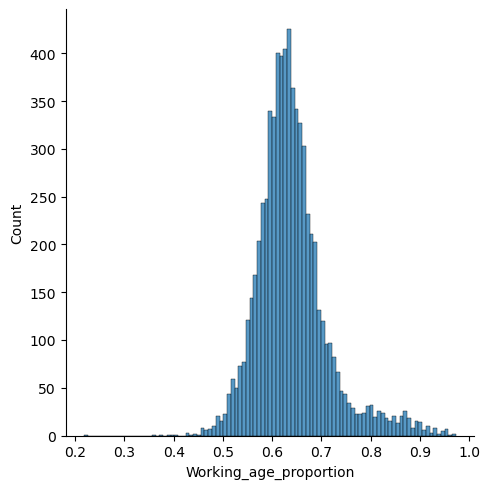

In [21]:
sns.displot(simd["Working_age_proportion"])

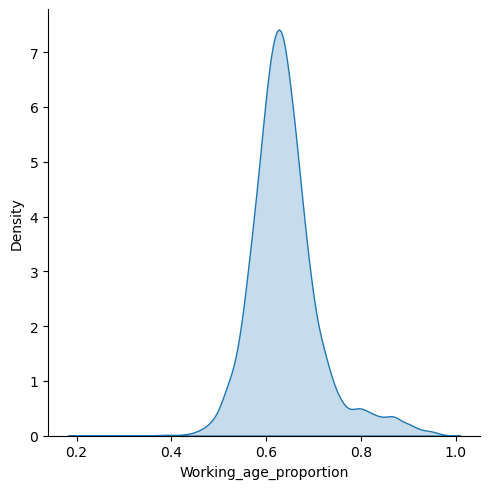

In [22]:
sns.displot(simd["Working_age_proportion"], kind="kde", fill=True)

-   Which council area is, on average, the least deprived based on the
    Income domain?

In [28]:
simd.loc[simd["Council_area"] == "Aberdeen City"]

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank,Working_age_proportion
0,S01006506,Culter,Aberdeen City,894,580,4691,3936.0,3220.0,5174,5887,4724,4664.0,3248.0,0.648770
1,S01006507,Culter,Aberdeen City,793,470,4862,4829.0,4481.0,5051,4384,2148,4602.0,3486.0,0.592686
2,S01006508,Culter,Aberdeen City,624,461,5686,4460.0,5110.0,5942,5915,4200,4563.5,5342.0,0.738782
3,S01006509,Culter,Aberdeen City,537,307,4332,3481.0,3229.0,3871,6401,3982,5626.0,4394.5,0.571695
4,S01006510,Culter,Aberdeen City,663,415,3913,3344.0,3448.0,3049,4092,5588,3885.0,3736.0,0.625943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,S01006784,Balgownie and Donmouth East,Aberdeen City,580,387,5945,5394.0,5203.5,5927,5745,3562,4710.0,5072.0,0.667241
279,S01006785,Denmore,Aberdeen City,576,384,6421,6910.0,6682.0,6806,6635,953,5725.0,5711.0,0.666667
280,S01006786,Denmore,Aberdeen City,801,535,5827,5582.0,5782.0,6412,6040,1269,6641.0,4486.0,0.667915
281,S01006787,Denmore,Aberdeen City,626,361,5240,5092.0,5122.0,5385,3721,2346,6189.0,5515.0,0.576677


In [30]:
income_rank_df = simd.loc[:, ["Council_area", "SIMD2020v2_Income_Domain_Rank"]]
income_rank_df.head()

,Council_area,SIMD2020v2_Income_Domain_Rank
0,Aberdeen City,3936.0
1,Aberdeen City,4829.0
2,Aberdeen City,4460.0
3,Aberdeen City,3481.0
4,Aberdeen City,3344.0


In [31]:
tidy_income_rank_df = income_rank_df.rename(
    columns={"Council_area": "area", "SIMD2020v2_Income_Domain_Rank": "rank"}
)
tidy_income_rank_df.head()

,area,rank
0,Aberdeen City,3936.0
1,Aberdeen City,4829.0
2,Aberdeen City,4460.0
3,Aberdeen City,3481.0
4,Aberdeen City,3344.0


In [33]:
income_rank_grouped = tidy_income_rank_df.groupby("area")
income_rank_grouped

In [37]:
mean_income_rank_df = income_rank_grouped.mean()
mean_income_rank_df

,rank
area,
Aberdeen City,4263.863958
Aberdeenshire,4800.075000
Angus,3786.593548
Argyll and Bute,3728.028000
City of Edinburgh,4371.351759
Clackmannanshire,3077.305556
Dumfries and Galloway,3413.870647
Dundee City,2712.803191
East Ayrshire,2810.294479


In [38]:
least_deprived_mean_rank = mean_income_rank_df.max()
least_deprived_mean_rank

rank    4852.442623
dtype: float64

In [47]:
mean_income_rank_df.loc[mean_income_rank_df["rank"] > 0.0]

,rank
area,
Aberdeen City,4263.863958
Aberdeenshire,4800.075000
Angus,3786.593548
Argyll and Bute,3728.028000
City of Edinburgh,4371.351759
Clackmannanshire,3077.305556
Dumfries and Galloway,3413.870647
Dundee City,2712.803191
East Ayrshire,2810.294479


In [48]:
type(mean_income_rank_df["rank"])

pandas.core.series.Series

In [50]:
type(mean_income_rank_df["rank"] == least_deprived_mean_rank)

ValueError: Can only compare identically-labeled Series objects

In [51]:
type(least_deprived_mean_rank)

pandas.core.series.Series

In [52]:
least_deprived_mean_rank[0]

/var/folders/jy/0szkyp1d641gx742flnfxrw00000gn/T/ipykernel_71124/121941953.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  least_deprived_mean_rank[0]


np.float64(4852.44262295082)

In [54]:
type(mean_income_rank_df["rank"] == 4852.44262295082)

pandas.core.series.Series

In [55]:
type(mean_income_rank_df["rank"] == least_deprived_mean_rank[0])

/var/folders/jy/0szkyp1d641gx742flnfxrw00000gn/T/ipykernel_71124/1820214290.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(mean_income_rank_df["rank"] == least_deprived_mean_rank[0])


pandas.core.series.Series

In [56]:
mean_income_rank_df.loc[mean_income_rank_df["rank"] == least_deprived_mean_rank[0]]

/var/folders/jy/0szkyp1d641gx742flnfxrw00000gn/T/ipykernel_71124/3595344813.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_income_rank_df.loc[mean_income_rank_df["rank"] == least_deprived_mean_rank[0]]


,rank
area,
East Renfrewshire,4852.442623


-   What is the total population of the “Glasgow City” council?

In [58]:
simd.loc[simd["Council_area"] == "Glasgow City"]

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population,SIMD2020v2_Rank,SIMD2020v2_Income_Domain_Rank,SIMD2020_Employment_Domain_Rank,SIMD2020_Health_Domain_Rank,SIMD2020_Education_Domain_Rank,SIMD2020_Access_Domain_Rank,SIMD2020_Crime_Domain_Rank,SIMD2020_Housing_Domain_Rank,Working_age_proportion
3252,S01009758,Darnley East,Glasgow City,624,407,4997,5861.5,4396.0,3273,4903,3216,5523.0,1021.0,0.652244
3253,S01009759,Darnley East,Glasgow City,860,570,161,23.0,168.0,255,1291,6001,791.0,494.0,0.662791
3254,S01009760,Darnley East,Glasgow City,852,550,998,1083.0,971.0,881,715,5706,2079.0,1157.0,0.645540
3255,S01009761,Darnley East,Glasgow City,846,558,3135,2784.0,3348.0,2782,2530,3720,5459.0,1878.0,0.659574
3256,S01009762,Darnley East,Glasgow City,1183,801,1247,830.0,1946.0,1499,547,6870,1904.0,870.0,0.677092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,S01010499,Drumry East,Glasgow City,738,442,28,41.0,75.0,78,64,6363,80.0,258.0,0.598916
3994,S01010500,Drumry West,Glasgow City,1022,664,420,311.0,618.0,179,633,6172,2280.0,798.0,0.649706
3995,S01010501,Drumry West,Glasgow City,1119,748,974,1024.0,990.5,471,1005,5528,3308.0,1530.0,0.668454
3996,S01010502,Drumry West,Glasgow City,806,563,2146,2026.0,2008.0,1550,2322,5171,3410.0,1525.5,0.698511


In [61]:
simd.loc[simd["Council_area"] == "Glasgow City"]["Total_population"].sum()

np.int64(621020)

-   Can you plot the ranking distribution in “Glasgow City”? How does it
    compare to the “City of Edinburgh”?

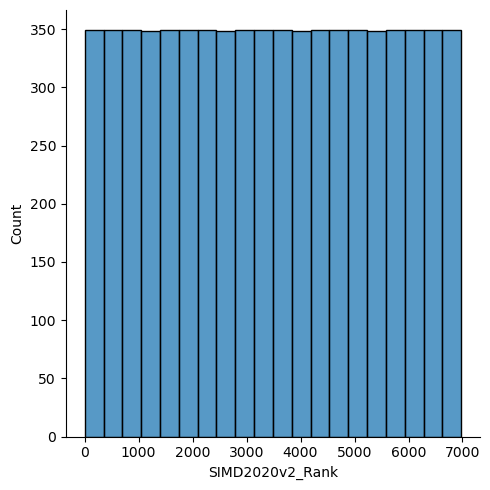

In [62]:
sns.displot(simd["SIMD2020v2_Rank"])

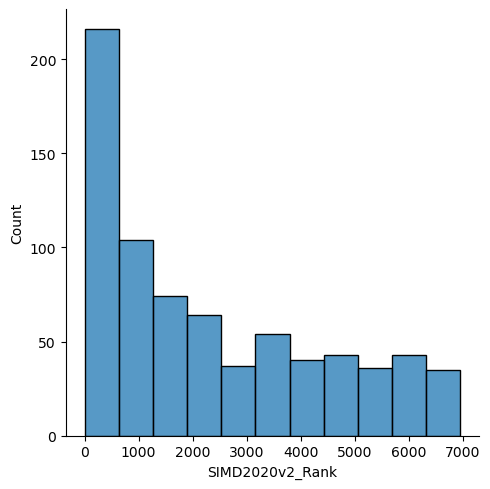

In [63]:
sns.displot(simd.loc[simd["Council_area"] == "Glasgow City"]["SIMD2020v2_Rank"])

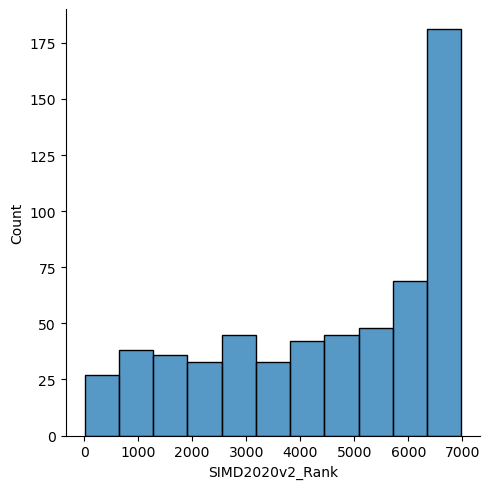

In [64]:
sns.displot(simd.loc[simd["Council_area"] == "City of Edinburgh"]["SIMD2020v2_Rank"])

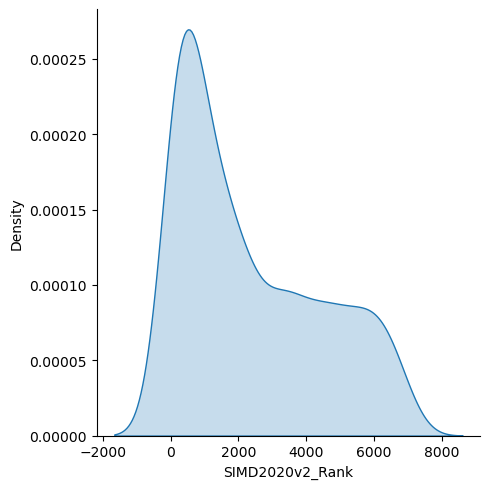

In [66]:
sns.displot(simd.loc[simd["Council_area"] == "Glasgow City"]["SIMD2020v2_Rank"], kind="kde", fill=True)

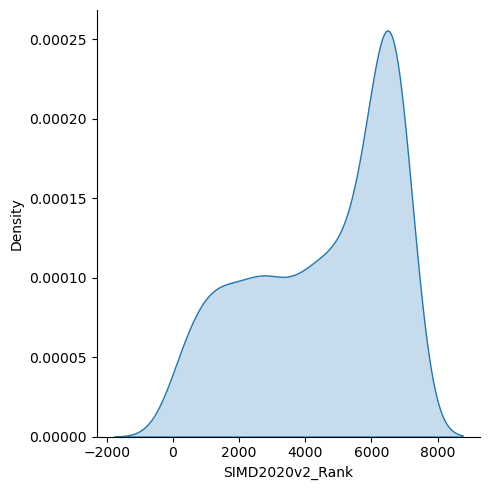

In [67]:
sns.displot(simd.loc[simd["Council_area"] == "City of Edinburgh"]["SIMD2020v2_Rank"], kind="kde", fill=True)

# TODO

-   Can you figure out how to create a scatter plot of a relationship
    between the education and health domain rankings?
-   What else can you derive from the data?